**Рекомендации менеджеру по результатам A/B-тестирования**

Автор: Зохра Серхенова

1. Сначала загружаем и обрабатываем данные

In [36]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
data = pd.read_excel('/content/drive/MyDrive/AB_Test_Results.xlsx')
data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,USER_ID,VARIANT_NAME,REVENUE
0,737,variant,0.0
1,2423,control,0.0
2,9411,control,0.0
3,7311,control,0.0
4,6174,variant,0.0


2. Проверяем данные на наличие пропущенных значений

In [37]:
print(data.isnull().sum())

USER_ID         0
VARIANT_NAME    0
REVENUE         0
dtype: int64


3. После того, как мы проверили данные на наличие пропущенных значений, мы можем приступать к их анализу

In [38]:
# Проверка общего числа пользователей в каждой выборке
variant_counts = data['VARIANT_NAME'].value_counts()
print("Количество пользователей в каждой выборке:")
print(variant_counts)

Количество пользователей в каждой выборке:
variant    5016
control    4984
Name: VARIANT_NAME, dtype: int64


Средний доход для контрольной группы:  0.12901284109149277
Средний доход для вариативной группы:  0.07006977671451356


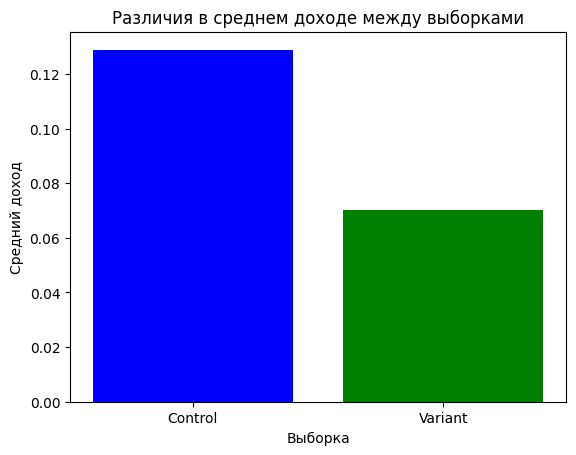

In [40]:
# Разделяем данные на контрольную и вариативную группы
control = data[data['VARIANT_NAME'] == 'control']
variant = data[data['VARIANT_NAME'] == 'variant']

# Считаем средний доход для каждой группы
control_revenue = control['REVENUE'].mean()
variant_revenue = variant['REVENUE'].mean()

print('Средний доход для контрольной группы: ', control_revenue)
print('Средний доход для вариативной группы: ', variant_revenue)

# Визуализация различий в доходе
import matplotlib.pyplot as plt

# Визуализация суммарного дохода
labels = ['Control', 'Variant']
values = [control_revenue, variant_revenue]
colors = ['blue', 'green']

plt.bar(labels, values, color=colors)
plt.xlabel('Выборка')
plt.ylabel('Средний доход')
plt.title('Различия в среднем доходе между выборками')
plt.show()

Суммарный доход для контрольной группы:  643.0
Суммарный доход для вариативной группы:  351.47


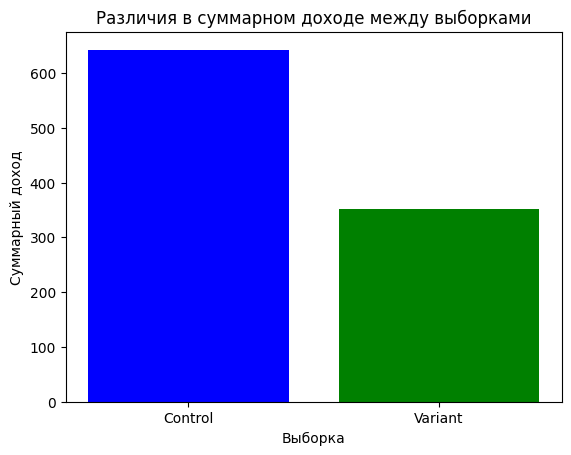

In [41]:
# Считаем суммарный доход для каждой группы
control_revenue = control['REVENUE'].sum()
variant_revenue = variant['REVENUE'].sum()

print('Суммарный доход для контрольной группы: ', control_revenue)
print('Суммарный доход для вариативной группы: ', variant_revenue)

# Визуализация суммарного дохода
labels = ['Control', 'Variant']
values = [control_revenue, variant_revenue]
colors = ['blue', 'green']

plt.bar(labels, values, color=colors)
plt.xlabel('Выборка')
plt.ylabel('Суммарный доход')
plt.title('Различия в суммарном доходе между выборками')
plt.show()

4. Теперь мы можем провести статистический тест, чтобы определить, есть ли значительная разница между двуми группами

In [42]:
# Проверка статистической значимости различий в доходе между выборками
from scipy.stats import ttest_ind

control_revenue = data[data['VARIANT_NAME'] == 'control']['REVENUE']
variant_revenue = data[data['VARIANT_NAME'] == 'variant']['REVENUE']

t_stat, p_value = ttest_ind(control_revenue, variant_revenue)
print("\nСтатистическая значимость различий в доходе:")
print("t-статистика:", t_stat)
print("p-value:", p_value)


Статистическая значимость различий в доходе:
t-статистика: 1.2711634519010084
p-value: 0.20370007853373565


5. В зависимости от результатов т-теста и среднего дохода каждой группы, можно сделать следующие выводы:

In [43]:
# Рекомендации
if p_value < 0.05:
    if variant_revenue['variant'] > control_revenue['control']:
        print("\nРекомендация: Вариант 'variant' статистически значимо увеличивает доход.")
    else:
        print("\nРекомендация: Вариант 'control' статистически значимо увеличивает доход.")
else:
    print("\nРекомендация: Результаты эксперимента не являются статистически значимыми.")


Рекомендация: Результаты эксперимента не являются статистически значимыми.


**ОБЩИЕ ВЫВОДЫ:**

Если p-value больше 0.05 и средний доход вариативной группы ниже, чем контрольной, то ***изменения не имели значительного влияния на доход***.

Но при этом необходимо учитывать, что эти рекомендации базируются на статистическом анализе и могут не учитывать другие важные факторы, такие как долгосрочное влияние изменений на пользовательский опыт или бизнес-стратегию компании.